# Heart Disease Dataset 
## Aniket Aher   , RollNo : 1 
## Vaibhav Kumar , RollNo : 19
## Rahul Patil , RollNo : 30 
## Saumik Datta , RollNo : 40

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore') #ignoring warmings

In [3]:
heart_data = pd.read_csv("D:\\heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data.shape

(1025, 14)

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:>

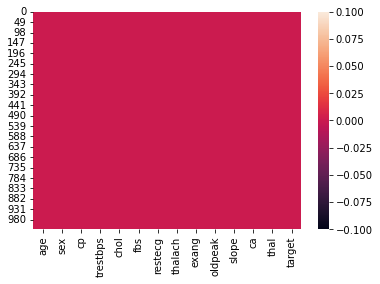

In [9]:
sns.heatmap(heart_data.isnull())

**no null values**

In [10]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [11]:
heart_data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

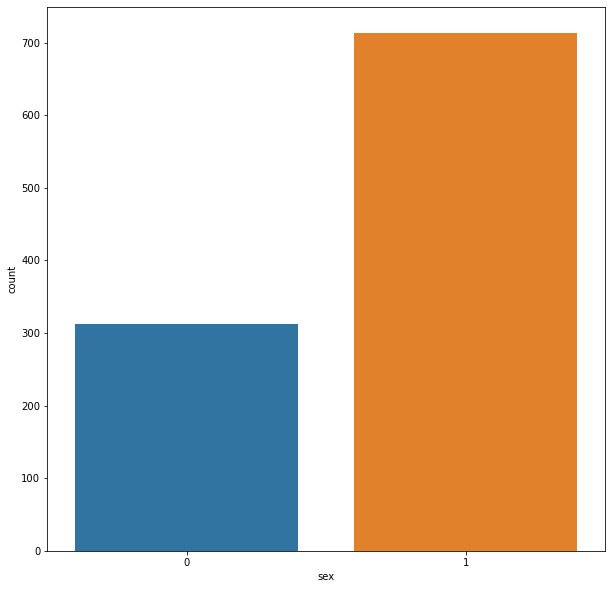

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x='sex',data=heart_data)

    713 male 
    312 female

as per dataset sex has been converted into numeric value i.e mapping is done where 1 = male and 0 = female

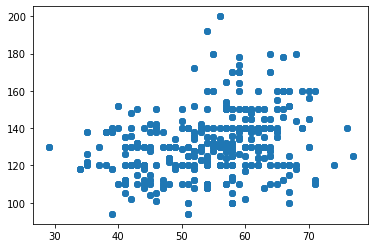

In [14]:
plt.scatter(heart_data['age'],heart_data['trestbps'])
plt.show()
# blood pressure when patient was admitted 

Max blood pressure is 200 and between age of 50 to 60 its above 170

<AxesSubplot:>

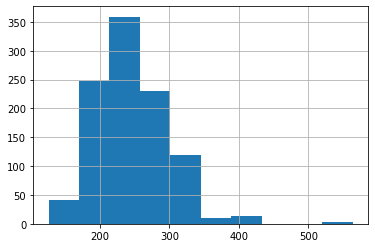

In [15]:
heart_data['chol'].hist()
# chol level in  mg/dl x-axis cholestrol level in  mg/dl and y-axis =count

Max Cholrestrol level is 350+

<AxesSubplot:>

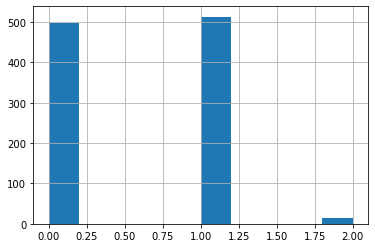

In [16]:
heart_data['restecg'].hist()
# resting electrocardiographic results

<AxesSubplot:>

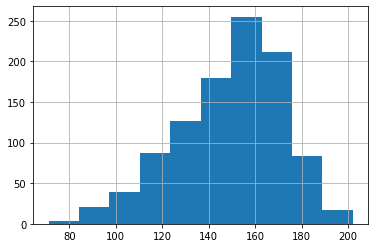

In [17]:
heart_data['thalach'].hist()
# maximum heart rate achieved

max heart rate is 250+

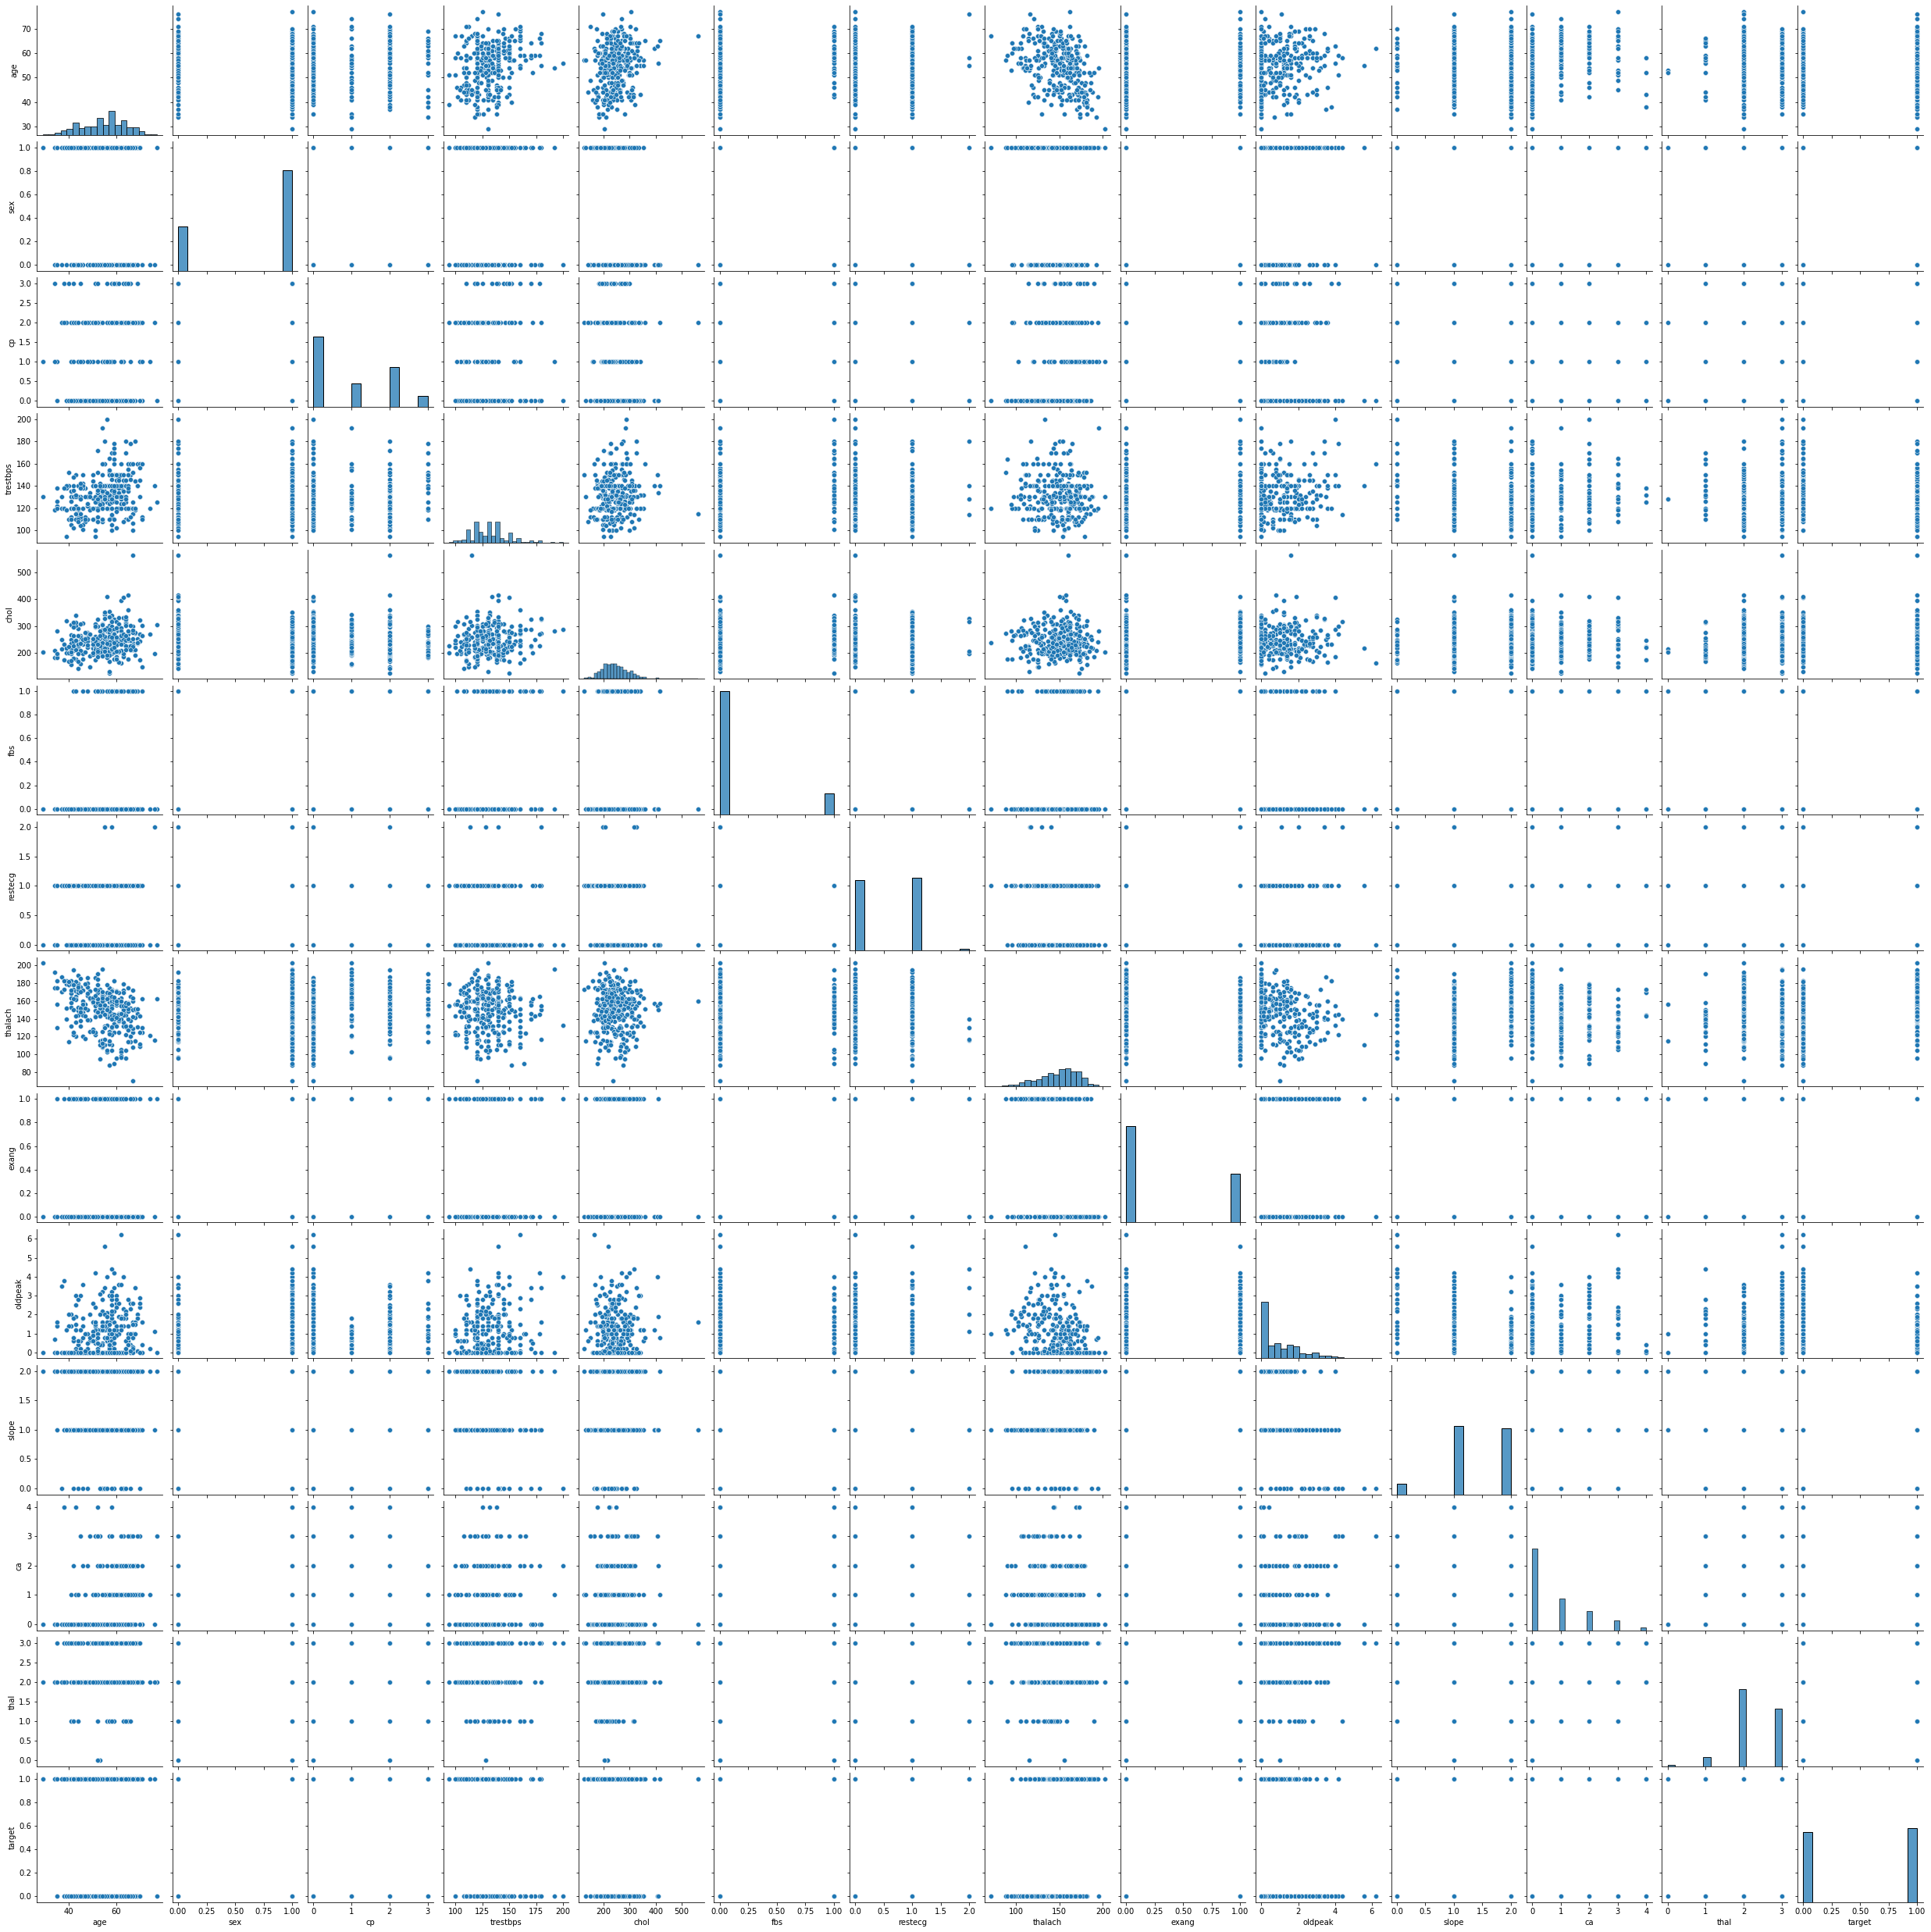

In [18]:
sns.pairplot(heart_data)

Splitting the Data 

In [19]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [21]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train);

In [26]:
# accuracy on training data
y_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)
training_data_accuracy

0.8524390243902439

# 86 % Accurate

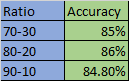

In [28]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Building a Predictive System**

In [114]:
#input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
#            age, sex, cp,  trestbps ,chol,fbs,restecg,*thalach*,exang,*oldpeak*,*slope*,*ca,thal
input_data = (70,  1,  1,    140,     250,  0,    1,     150,    1,    0.0,       2,     0 ,1 )
# as the input data is in tuple we need to 
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)


# its easy to reshape numpy array
#  numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


# Linear Regression

<AxesSubplot:xlabel='age', ylabel='trestbps'>

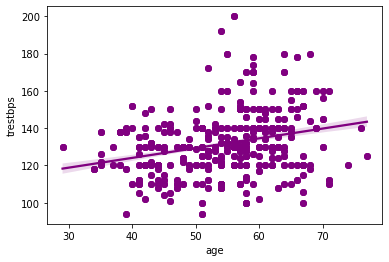

In [4]:
sns.regplot(heart_data['age'],heart_data['trestbps'],color='purple')


In [5]:
from sklearn.linear_model import LinearRegression

In [20]:
X1=heart_data[['age']].values
X1

array([[52],
       [53],
       [70],
       ...,
       [47],
       [50],
       [54]], dtype=int64)

In [21]:
Y = heart_data['target']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=2)

In [23]:
LRmodel=LinearRegression()
# training the LinearRegression model with Training data
LRmodel.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Mean Squared error on test data
y_pred = LRmodel.predict(X_test)
training_data_accuracy = mean_squared_error(y_pred, Y_test)
training_data_accuracy

0.23709228728169934

thus, the mean square error in training model data is 23.7% i.e 24%

In [25]:
LRmodel.score(X_test,Y_test)

0.05106634542729349

Here, the data displays error of 0.05

In [26]:
Heart_data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
Heart_data

,Actual,Predicted
546,0,0.323289
980,1,0.487669
908,0,0.424446
577,0,0.323289
846,1,0.765852
...,...,...
922,1,0.652050
832,1,0.348578
451,1,0.588826
775,1,0.563537


In [40]:
new_data=pd.DataFrame([2115,900])
new_data

,0
0,2115
1,900


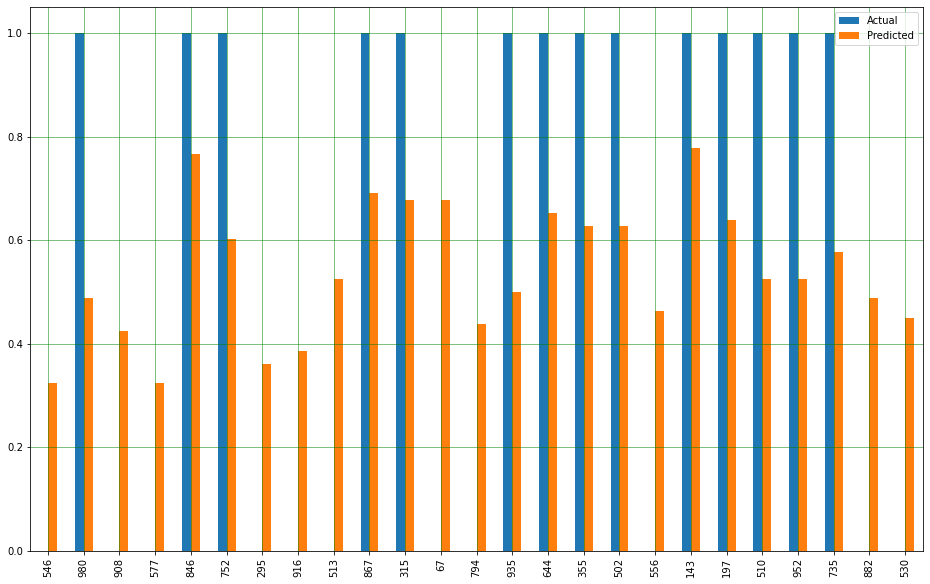

In [41]:
linear_ac_plot = Heart_data.head(25)
linear_ac_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Here actual value is higher as compared to predicted value

In [42]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.47274455230666684
Mean Squared Error: 0.23709228728169934
Root Mean Squared Error: 0.4869212331390975


In [43]:
#corelation 
corr = Heart_data.corr()

<AxesSubplot:>

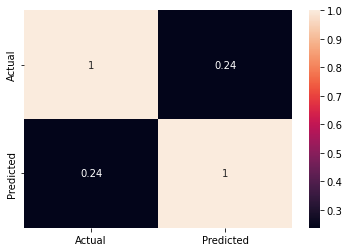

In [44]:
sns.heatmap( corr, annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1946468aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x19464698040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1946468a790>],
 'medians': [<matplotlib.lines.Line2D at 0x194646985e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x194646988b0>],
 'means': []}

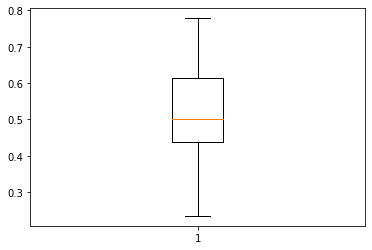

In [45]:
plt.boxplot(Heart_data['Predicted']) #boxplot of Predicted

[Text(0, 0, '29'),
 Text(1, 0, '34'),
 Text(2, 0, '35'),
 Text(3, 0, '37'),
 Text(4, 0, '38'),
 Text(5, 0, '39'),
 Text(6, 0, '40'),
 Text(7, 0, '41'),
 Text(8, 0, '42'),
 Text(9, 0, '43'),
 Text(10, 0, '44'),
 Text(11, 0, '45'),
 Text(12, 0, '46'),
 Text(13, 0, '47'),
 Text(14, 0, '48'),
 Text(15, 0, '49'),
 Text(16, 0, '50'),
 Text(17, 0, '51'),
 Text(18, 0, '52'),
 Text(19, 0, '53'),
 Text(20, 0, '54'),
 Text(21, 0, '55'),
 Text(22, 0, '56'),
 Text(23, 0, '57'),
 Text(24, 0, '58'),
 Text(25, 0, '59'),
 Text(26, 0, '60'),
 Text(27, 0, '61'),
 Text(28, 0, '62'),
 Text(29, 0, '63'),
 Text(30, 0, '64'),
 Text(31, 0, '65'),
 Text(32, 0, '66'),
 Text(33, 0, '67'),
 Text(34, 0, '68'),
 Text(35, 0, '69'),
 Text(36, 0, '70'),
 Text(37, 0, '71'),
 Text(38, 0, '74'),
 Text(39, 0, '76'),
 Text(40, 0, '77')]

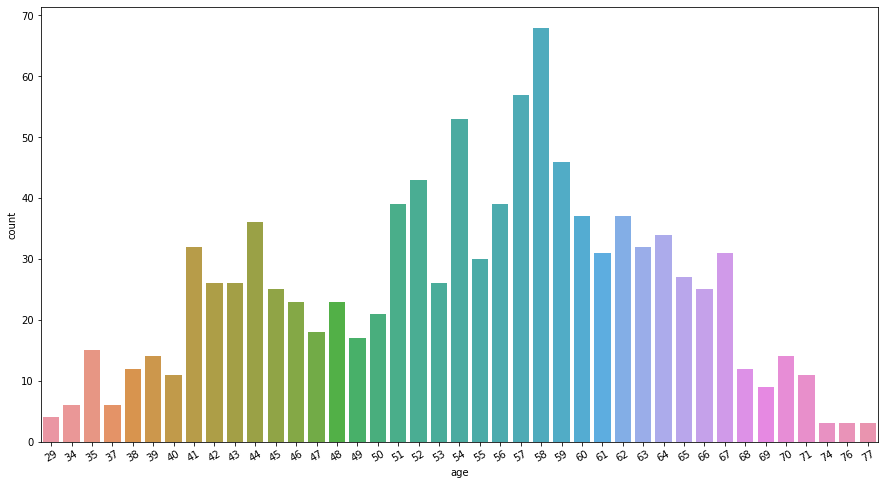

In [46]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='age',data=heart_data) #label
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

thus, the average age count is max in range 40 to 70
Highest number of patients lie in the age of 58 and lowest in age group 74,76,77 

# Multivariate Regression

In [38]:
x2=heart_data.drop('target',axis=1)
x2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [39]:
y2=heart_data['target'].values
y2

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2, random_state=2)

In [44]:
LRmodel=LogisticRegression()
# training the LogisticRegression model with Training data
LRmodel.fit(X_train, Y_train)

LogisticRegression()

In [45]:
# Mean Squared error on test data
y_pred = LRmodel.predict(X_test)
training_data_accuracy = mean_squared_error(y_pred, Y_test)
training_data_accuracy

0.15121951219512195

thus, the mean square error in training model data is 15%

In [46]:
LRmodel.score(X_test,Y_test)

0.848780487804878

Here, the data displays score of  0.84

In [47]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.15121951219512195
Mean Squared Error: 0.15121951219512195
Root Mean Squared Error: 0.3888695310706689


# KNN Part

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [56]:
features=heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']].values
classes=heart_data['target'].values

In [57]:
classes2=classes.astype(str)
classes2

array(['0', '0', '0', ..., '0', '1', '0'], dtype='<U21')

[0 1 2 3]


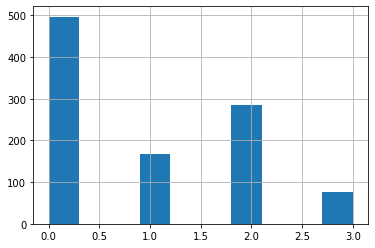

In [58]:
heart_data['cp'].hist()
print(heart_data['cp'].unique())
# [typical angina, atypical angina, non-anginal, asymptomatic]

<AxesSubplot:>

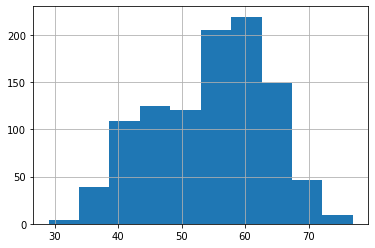

In [59]:
heart_data['age'].hist()

In [60]:
classes2.shape

(1025,)

In [61]:
(train_feat,test_feat,train_classes,test_classes)=train_test_split(features,classes,train_size=0.8,random_state=40)

In [62]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(train_feat,train_classes)

KNeighborsClassifier(n_neighbors=4)

In [63]:
pred=knn.predict(test_feat)
print("accuracy",accuracy_score(test_classes,pred))

accuracy 0.8195121951219512


# Accuracy of KNN - 82%
# accuracy of KNN with different number of clusters

In [64]:
nn=np.arange(1,9)
train_accuracy=np.empty(len(nn))
test_accuracy=np.empty(len(nn))
for i,k in enumerate(nn):
    #print(i)
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(train_feat,train_classes)
    pred1=knn1.predict(test_feat)
    train_accuracy[i]=knn1.score(train_feat,train_classes)
    test_accuracy[i]=knn1.score(test_feat,test_classes)
    print("accuracy ",i,":",accuracy_score(test_classes,pred1))
    
print("train_accuracy\n",train_accuracy)
print("test_accuracy\n",test_accuracy)

accuracy  0 : 1.0
accuracy  1 : 0.9560975609756097
accuracy  2 : 0.9073170731707317
accuracy  3 : 0.8195121951219512
accuracy  4 : 0.7463414634146341
accuracy  5 : 0.7902439024390244
accuracy  6 : 0.7560975609756098
accuracy  7 : 0.7463414634146341
train_accuracy
 [1.         0.99512195 0.98902439 0.94512195 0.9195122  0.83536585
 0.7804878  0.76341463]
test_accuracy
 [1.         0.95609756 0.90731707 0.8195122  0.74634146 0.7902439
 0.75609756 0.74634146]


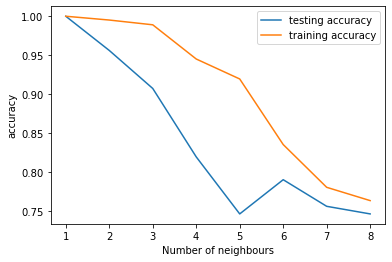

In [65]:
plt.title('')
plt.plot(nn,test_accuracy,label='testing accuracy')
plt.plot(nn,train_accuracy,label='training accuracy')
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('accuracy')
plt.show()

here training accuracy is higher as compared to testing accuracy

In [32]:
x=heart_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values

In [33]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [34]:
kmeans1=KMeans(n_clusters=4)
kmeans1.fit(x)
y_kmeans1=kmeans1.predict(x)
print(y_kmeans1)
kmeans1.cluster_centers_

[0 0 0 ... 1 2 0]


array([[5.19437500e+01, 7.40625000e-01, 9.71875000e-01, 1.28418750e+02,
        1.93196875e+02, 1.43750000e-01, 6.40625000e-01, 1.48406250e+02,
        3.12500000e-01, 1.11125000e+00, 1.40625000e+00, 6.03125000e-01,
        2.21250000e+00],
       [5.66136364e+01, 6.51515152e-01, 8.03030303e-01, 1.38181818e+02,
        3.02386364e+02, 1.74242424e-01, 4.62121212e-01, 1.44170455e+02,
        4.43181818e-01, 1.20909091e+00, 1.37121212e+00, 9.12878788e-01,
        2.39772727e+00],
       [5.46470588e+01, 7.15294118e-01, 1.01411765e+00, 1.29743529e+02,
        2.43569412e+02, 1.36470588e-01, 5.08235294e-01, 1.52477647e+02,
        2.94117647e-01, 9.20000000e-01, 1.38588235e+00, 7.48235294e-01,
        2.35058824e+00],
       [6.26250000e+01, 0.00000000e+00, 7.50000000e-01, 1.36687500e+02,
        4.36250000e+02, 1.87500000e-01, 0.00000000e+00, 1.55500000e+02,
        1.87500000e-01, 2.03125000e+00, 1.18750000e+00, 1.31250000e+00,
        2.62500000e+00]])

In [69]:
n_clusters=4
silhouette_avg=silhouette_score(x,y_kmeans1)
print("For n_clusters=",n_clusters,"the average silhouette_score is: ",silhouette_avg)

For n_clusters= 4 the average silhouette_score is:  0.24901270972871223


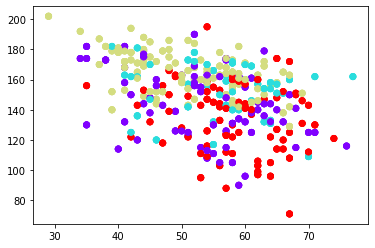

In [70]:
#print(heart_data.columns) age and thalach
plt.scatter(x[:,0],x[:,7],c=y_kmeans1,cmap='rainbow')

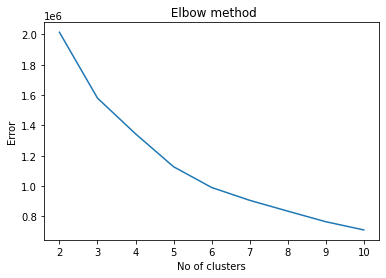

In [38]:
Error =[]
for i in range(2, 11):
    kmeans= KMeans (n_clusters = i).fit (x)
    #kemeons.fit(x)
    Error.append (kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot (range(2, 11), Error)
plt.title(" Elbow method")
plt.xlabel( "No of clusters")
plt.ylabel( "Error")
plt.show()


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [73]:
features=heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']].values
classes=heart_data['target'].values

In [74]:
classes2=classes.astype(str)
classes2
#converting numeric values into string for decision tree classes

array(['0', '0', '0', ..., '0', '1', '0'], dtype='<U21')

In [75]:
(train_feat,test_feat,train_classes,test_classes)=train_test_split(features,classes,test_size=0.2,random_state=1)

In [76]:
print("train_feat\n",train_feat,"\n",train_feat.shape)
print("train_classes\n",train_classes,"\n",train_classes.shape)
print("\n \n")
print("test_feat\n",test_feat,"\n",test_feat.shape,"\n")
print("test_classes\n",test_classes,"\n",test_classes.shape)

train_feat
 [[57.  1.  0. ...  2.  0.  3.]
 [59.  1.  3. ...  2.  2.  2.]
 [62.  0.  0. ...  1.  0.  2.]
 ...
 [56.  1.  0. ...  1.  1.  2.]
 [62.  1.  0. ...  1.  2.  3.]
 [64.  1.  3. ...  1.  0.  3.]] 
 (820, 13)
train_classes
 [1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 

In [77]:
#training for decsion tree classisifier
dectree=DecisionTreeClassifier(criterion='gini')
dectree.fit(train_feat,train_classes)

DecisionTreeClassifier()

In [78]:
#from sklearn import metrics
pred=dectree.predict(test_feat)
print("Accuracy",accuracy_score(test_classes,pred))
print("Classification Report\n",classification_report(test_classes,pred))
print("Confusion Matrix\n",confusion_matrix(test_classes,pred))


Accuracy 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix
 [[109   0]
 [  0  96]]


<AxesSubplot:>

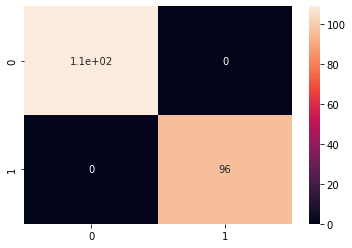

In [79]:
sns.heatmap(confusion_matrix(test_classes,pred),annot=True)

In [80]:
from sklearn import tree
fig = plt.figure(figsize=(150,150))
_=tree.plot_tree(dectree,
                 feature_names=features,
                 class_names=classes2,
                filled=True)

In [81]:
test_rep=tree.export_text(dectree)
print(test_rep)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_7 <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  96.50
|   |   |   |   |   |--- feature_4 <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  316.50
|   |   |   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_10 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |   |--- feature_3 <= 115.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  115.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  1.50
|   |   |   |   |   |   |--- class: 1
|   |

# using Entropy

In [82]:
#training for decsion tree classisifier
dectree=DecisionTreeClassifier(criterion='entropy')
dectree.fit(train_feat,train_classes)

DecisionTreeClassifier(criterion='entropy')

In [83]:
#from sklearn import metrics
pred=dectree.predict(test_feat)
print(pred)
print("Accuracy",accuracy_score(test_classes,pred))
print("Classification Report\n",classification_report(test_classes,pred))
print("Confusion Matrix\n",confusion_matrix(test_classes,pred))

[0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0]
Accuracy 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix
 [[109   0]
 [  0  96]]


<AxesSubplot:>

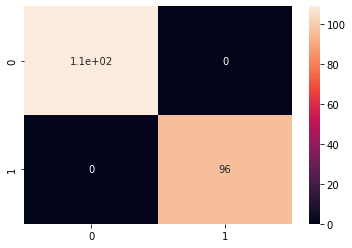

In [84]:
sns.heatmap(confusion_matrix(test_classes,pred),annot=True)

both Gini index and entropy having accuracy as 1.00 on test size=0.2 & test_stize=0.1 i.e ratio 80-20 and 90-10 respectively


# naive bayes

In [85]:
x=heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']].values
y=heart_data['target'].values

In [86]:
#creating
nb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [88]:
nb.fit(x_train,y_train)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)

MultinomialNB()

In [89]:
y_prednb=nb.predict(x_test)
y_predgnb=gnb.predict(x_test)
y_predmnb=mnb.predict(x_test)

#check accuracy score
# print('Accuracy score nb',accuracy_score(y_test,y_prednb))
# print('Accuracy score gnb',accuracy_score(y_test,y_predgnb))
# print('Accuracy score mnb',accuracy_score(y_test,y_predmnb))

NB
calssification report
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       156
           1       0.81      0.86      0.84       152

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308

confusion matrix
 [[126  30]
 [ 21 131]]


<AxesSubplot:>

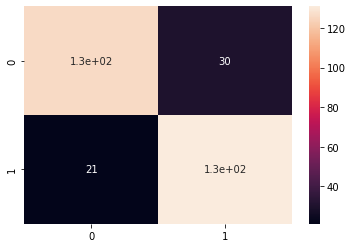

In [90]:
#classification and confusion matrix
print("NB")
print('calssification report\n',classification_report(y_test,y_prednb))
print('confusion matrix\n',confusion_matrix(y_test,y_prednb))
sns.heatmap(confusion_matrix(y_test,y_prednb),annot=True)

GNB
calssification report
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       156
           1       0.79      0.87      0.82       152

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308

confusion matrix
 [[120  36]
 [ 20 132]]


<AxesSubplot:>

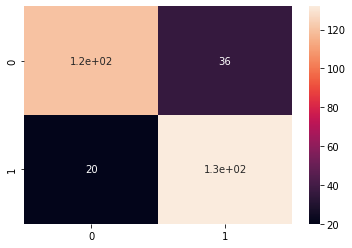

In [91]:
#classification and confusion matrix
print("GNB")
print('calssification report\n',classification_report(y_test,y_predgnb))
print('confusion matrix\n',confusion_matrix(y_test,y_predgnb))
sns.heatmap(confusion_matrix(y_test,y_predgnb),annot=True)

MNB
calssification report
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       156
           1       0.74      0.80      0.77       152

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308

confusion matrix
 [[114  42]
 [ 30 122]]


<AxesSubplot:>

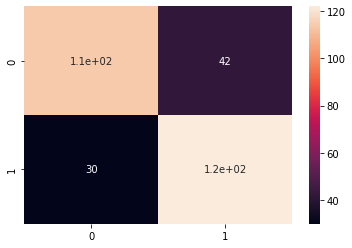

In [92]:
#classification and confusion matrix
print("MNB")
print('calssification report\n',classification_report(y_test,y_predmnb))
print('confusion matrix\n',confusion_matrix(y_test,y_predmnb))
sns.heatmap(confusion_matrix(y_test,y_predmnb),annot=True)

In [93]:
#check accuracy score
print('Accuracy score nb',accuracy_score(y_test,y_prednb))
print('Accuracy score gnb',accuracy_score(y_test,y_predgnb))
print('Accuracy score mnb',accuracy_score(y_test,y_predmnb))

Accuracy score nb 0.8344155844155844
Accuracy score gnb 0.8181818181818182
Accuracy score mnb 0.7662337662337663


#  Accuracy score nb 82%
#  Accuracy score gnb 80%
#  Accuracy score mnb 75%

# Gaussian NB having higher accuracy of 82%

# SVM

In [10]:
x = heart_data.drop('target',axis=1)


In [11]:
y = heart_data.target

In [12]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [15]:
svclassifier=SVC(kernel='poly',degree=3)

In [16]:
svclassifier.fit(x_train,y_train)

SVC(kernel='poly')

In [17]:
pred=svclassifier.predict(x_test)

In [18]:
pred


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [19]:
svclassifier.score(x_test,y_test)

0.7073170731707317

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       109
           1       0.66      0.77      0.71        96

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.72      0.71      0.71       205



In [21]:
print(confusion_matrix(y_test,pred))

[[71 38]
 [22 74]]


# Accuracy by all kernels

In [37]:
kernels=['linear','rbf','poly']
for kernel in kernels:
    sv=SVC(kernel=kernel).fit(x_train,y_train)
    pred=sv.predict(x_test)
    print("Accuracy:("+kernel+")", accuracy_score(y_test,pred))
    print("classification report\n",classification_report(y_test,pred))
    print("confusion matrix\n",confusion_matrix(y_test,pred),"\n")

Accuracy:(linear) 0.8195121951219512
classification report
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       109
           1       0.75      0.93      0.83        96

    accuracy                           0.82       205
   macro avg       0.83      0.83      0.82       205
weighted avg       0.84      0.82      0.82       205

confusion matrix
 [[79 30]
 [ 7 89]] 

Accuracy:(rbf) 0.697560975609756
classification report
               precision    recall  f1-score   support

           0       0.80      0.58      0.67       109
           1       0.63      0.83      0.72        96

    accuracy                           0.70       205
   macro avg       0.72      0.71      0.70       205
weighted avg       0.72      0.70      0.69       205

confusion matrix
 [[63 46]
 [16 80]] 

Accuracy:(poly) 0.7073170731707317
classification report
               precision    recall  f1-score   support

           0       0.76      0.65      

# accuracy using kernel='poly'

In [25]:
degrees=[0,1,2,3,4,5,20]
for degree in degrees:
    sv=SVC(kernel='poly',degree=degree).fit(x_train,y_train)
    pred=sv.predict(x_test)
    print("Accuracy:(",degree,")", accuracy_score(y_test,pred))

Accuracy:( 0 ) 0.4682926829268293
Accuracy:( 1 ) 0.6780487804878049
Accuracy:( 2 ) 0.697560975609756
Accuracy:( 3 ) 0.7073170731707317
Accuracy:( 4 ) 0.697560975609756
Accuracy:( 5 ) 0.7219512195121951
Accuracy:( 20 ) 0.7707317073170732


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       109
           1       0.69      0.92      0.79        96

    accuracy                           0.77       205
   macro avg       0.80      0.78      0.77       205
weighted avg       0.80      0.77      0.77       205



In [28]:
x=heart_data.drop(['target'],axis=1)

In [29]:
x.shape
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [30]:
y = heart_data['target']
y.shape

(1025,)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [33]:
regressor = SVR(kernel = 'linear')
regressor.fit(xtrain, ytrain)

pred1=regressor.predict(xtest)
mn1=mean_squared_error(ytest,pred1)

mae=mean_absolute_error(ytest,pred)
# print(pred1)
print(mn1)
print(mae)



0.1575706365286696
0.4878048780487805


In [34]:
regressor = SVR(kernel = 'poly')
regressor.fit(xtrain, ytrain)

pred1=regressor.predict(xtest)
mn1=mean_squared_error(ytest,pred1)

mae=mean_absolute_error(ytest,pred)
# print(pred1)
print(mn1)
print(mae)


0.212755632915984
0.4878048780487805


In [35]:
regressor = SVR(kernel = 'rbf')
regressor.fit(xtrain, ytrain)

pred1=regressor.predict(xtest)
mn1=mean_squared_error(ytest,pred1)

mae=mean_absolute_error(ytest,pred)
# print(pred1)
print(mn1)
print(mae)


0.21445917577792417
0.4878048780487805


# Conclusion
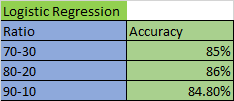

# 
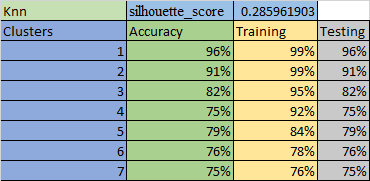
# 
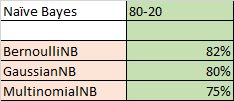
# 
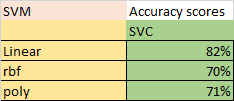

In logistic regression 80-20 ratio is having higher accuracy of 86%

in KNN on Basis of Graph training accuracy is highest as comapred to testing accuracy 

in Naive bayes bernoulliNB is having highest accuracy of 82% as compared to gaussian and multinomial

in svm linear having highest accuracy of 82%

# on above given conclusions we conclude that logistic regression is Suitable for the given dataset

# THANK YOU!